# Functional Data Analysis (FDA) t test

This notebook describes a non-parametric t-test using **fdaM**. Useful references include:

* Ramsay JO et al. (2009) [Functional Data Analysis with R and MATLAB](https://www.springer.com/jp/book/9780387981840)

* Cabaña A et al. (2017) [Permutation tests in the two-sample problem for functional data](https://link.springer.com/chapter/10.1007/978-3-319-55846-2_11)

____________
## Step 1:  Create basis functions

The first step in FDA is to define a set of basis functions that will be used to the model the data.  FDA has options for a number of different basis expansions (Fourier, B-splines, Wavelets, etc.). In this instance the functions 
will be fitted using B-splines as the data was truncated after the drive phase (propulsive phase of the movement), and as a consequence are likely not best represented by Fourier functions (which work best for periodic data).

In [1]:
forcebasis = create_bspline_basis([0,100], 51, 6); 

____________
## Step 2: Create smoothing definition and roughness penalty

Here we set up the penalty for roughness by defining a linear differential operator object. In this instance we have selected smoothing to be achieved by penalizing the squared curvature of the second derivative. Despite this smoothing should not possess any substantial effect on the data as it was already smoothed using a low-pass Butterowrth filter with a 6Hz cut-off Frequency.

Now we set up a functional parameter object to define the amount of smoothing. As mentioned above, smoothing should not possess any effect on this data set due to filtering that was already applied as a part of data pre-processing. A smoothing parameter is nominated to account for the magnitude of smoothing. Unfortunately the FDA Matlab software at 
present does not allow for the selection of a '0' smoothing parameter, and thus a parameter of 1e-15 was selected due to it having minimal effect on changes to the characteristics of the data set. 

The smoothing parameter will often be selected using a process of visual inspection of the fitting process using the 'plotfit_fd' function or by using processes such as generalized cross-validation.

In [2]:
Lfdobj              = int2Lfd(4); 
smoothing_parameter = 1e-15;
forcefdPar          = fdPar(forcebasis, Lfdobj, smoothing_parameter);

____________
## Step 3:  Load data & fit to the functional data model

After the functional model, including smoothing parameters, are finalized, they can be combined with the type of expansion process to fit each of the groups of curves to the functional data model using the **smooth_basis** function.


In [3]:
load('Warmenhoven2018-bow-force.mat');

time                    = linspace(0, 100, 51)'; 
Pin_Force_Bow_Female_fd = smooth_basis(time, Pin_Force_Bow_Female, forcefdPar);
Pin_Force_Bow_Male_fd   = smooth_basis(time, Pin_Force_Bow_Male, forcefdPar);

____________
## Step 4:  Conduct t test

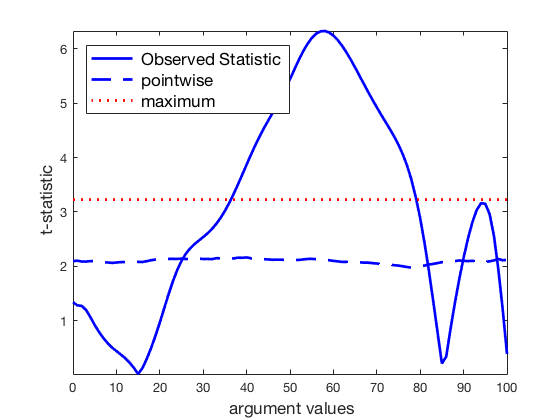

In [4]:
tpermStr1 = tperm_fd(Pin_Force_Bow_Male_fd, Pin_Force_Bow_Female_fd, 10000, 0.05);

The t statistic continuum here is nearly identical to the t statistic continuum from the SPM and SnPM analyses.  The only differences are: (1) the absolute t value is used, implying that this is a two-tailed test, and (2) the small differences in the t curve arise from the basis function modeling and smoothing processes assumptions applied to the dataset.

Other than these two differences, FDA-based permutation testing is identical to SnPM's permutation testing.